In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
from pathlib import Path
import glob
import seaborn as sns

In [29]:
cm = sns.color_palette("colorblind")

In [31]:
data_s2 = {}

for fname in glob.glob("./bias_dwave_s2/**/data*.csv", recursive=True):
    unit = 2 if "cluster" in fname else 1
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    if 'new' in param[5]: 
        fieldnames = ["D", "which", "chi", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, int, float, float, float, float, float, float]
        sf = param[5][12:15]
        ind = (hz, ta, E, sf, unit)
    else:
        fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, float, float, float, float, float, float]
        sf = param[5][8:11]
        ind = (hz, ta, E, sf, unit)
    
    with open(fname, 'r', newline='') as csvfile:
        csvfile.readline()
        data_s2[ind] = []
        for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
            for fn, typ in zip(fieldnames, dtypes):
                x[fn] = typ(x[fn])
            x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
            data_s2[ind].append(x)

In [32]:
data_s2 = {}
data_s2zz = {}
for fname in glob.glob("./bias_dwave_s2/**/Ezzs*.csv", recursive=True):
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    
    fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
    dtypes =     [int, str, float, float, float, float, float, float]
    sf = param[5][8:11]
    ind = (hz, ta, E, sf, unit)

    data_s2[ind] = []
    # data3[ind] = []
    
    with open(fname, 'r', newline='') as csvfile:
        for row in csv.DictReader(csvfile, delimiter=';'):
            for k, v in row.items():
                if k in ["D", 'chi']:
                    row[k] = int(v)
                elif k != 'which':
                    try:
                        row[k] = float(v)
                    except ValueError:
                        pass
            data_s2[ind].append(row)
            
            aa = {int(k[4:]): v for k, v in row.items() if 'Ezz_' in k}
            aa = dict(sorted(aa.items()))
            if (row['D'], row['which'], row['chi']) == (16, 'NN+BP', 16):
                data_s2zz[ind] = list(aa.values()) 

        # for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
        #     for fn, typ in zip(fieldnames, dtypes):
        #         x[fn] = typ(x[fn])
        #     x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
        #     data[ind].append(x)

In [33]:
data_s3 = {}
data_s3zz = {}
for fname in glob.glob("./bias_dwave_s3/**/Ezzs*.csv", recursive=True):
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    
    fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
    dtypes =     [int, str, float, float, float, float, float, float]
    sf = param[5][8:11]
    ind = (hz, ta, E, sf, unit)

    data_s3[ind] = []
    # data3[ind] = []
    
    with open(fname, 'r', newline='') as csvfile:
        for row in csv.DictReader(csvfile, delimiter=';'):
            for k, v in row.items():
                if k in ["D", 'chi']:
                    row[k] = int(v)
                elif k != 'which':
                    try:
                        row[k] = float(v)
                    except ValueError:
                        pass
            data_s3[ind].append(row)
            
            aa = {int(k[4:]): v for k, v in row.items() if 'Ezz_' in k}
            aa = dict(sorted(aa.items()))
            if (row['D'], row['which'], row['chi']) == (16, 'NN+BP', 16):
                data_s3zz[ind] = list(aa.values()) 

        # for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
        #     for fn, typ in zip(fieldnames, dtypes):
        #         x[fn] = typ(x[fn])
        #     x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
        #     data[ind].append(x)

(1e-15, 1)

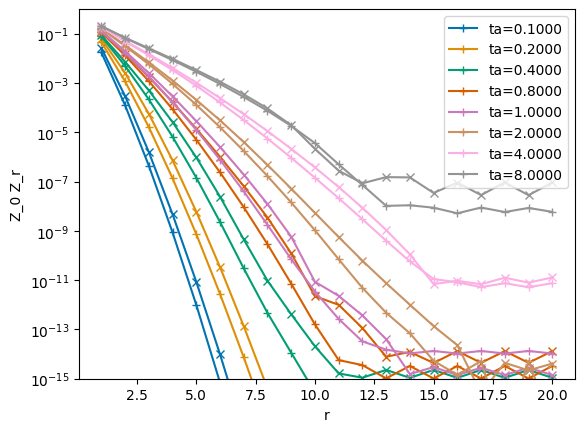

In [34]:

for i, ta in enumerate(['0.1000', '0.2000', '0.4000', '0.8000', '1.0000', '2.0000', '4.0000', '8.0000']):
    try:
        v = data_s2zz['0.0000', ta, '1.0', '0.3', 1]
        plt.semilogy(np.arange(20) + 1, np.abs(v), '-x', color=cm[i])

        v = data_s3zz['0.0000', ta, '1.0', '0.3', 1]
        plt.semilogy(np.arange(20) + 1, np.abs(v), '-+', label=f"ta={ta}", color=cm[i])
    except KeyError:
        pass
plt.legend()
plt.xlabel('r')
plt.ylabel('Z_0 Z_r')
# plt.title('1-exp(-40*s) critical point')
plt.ylim([1e-15, 1])

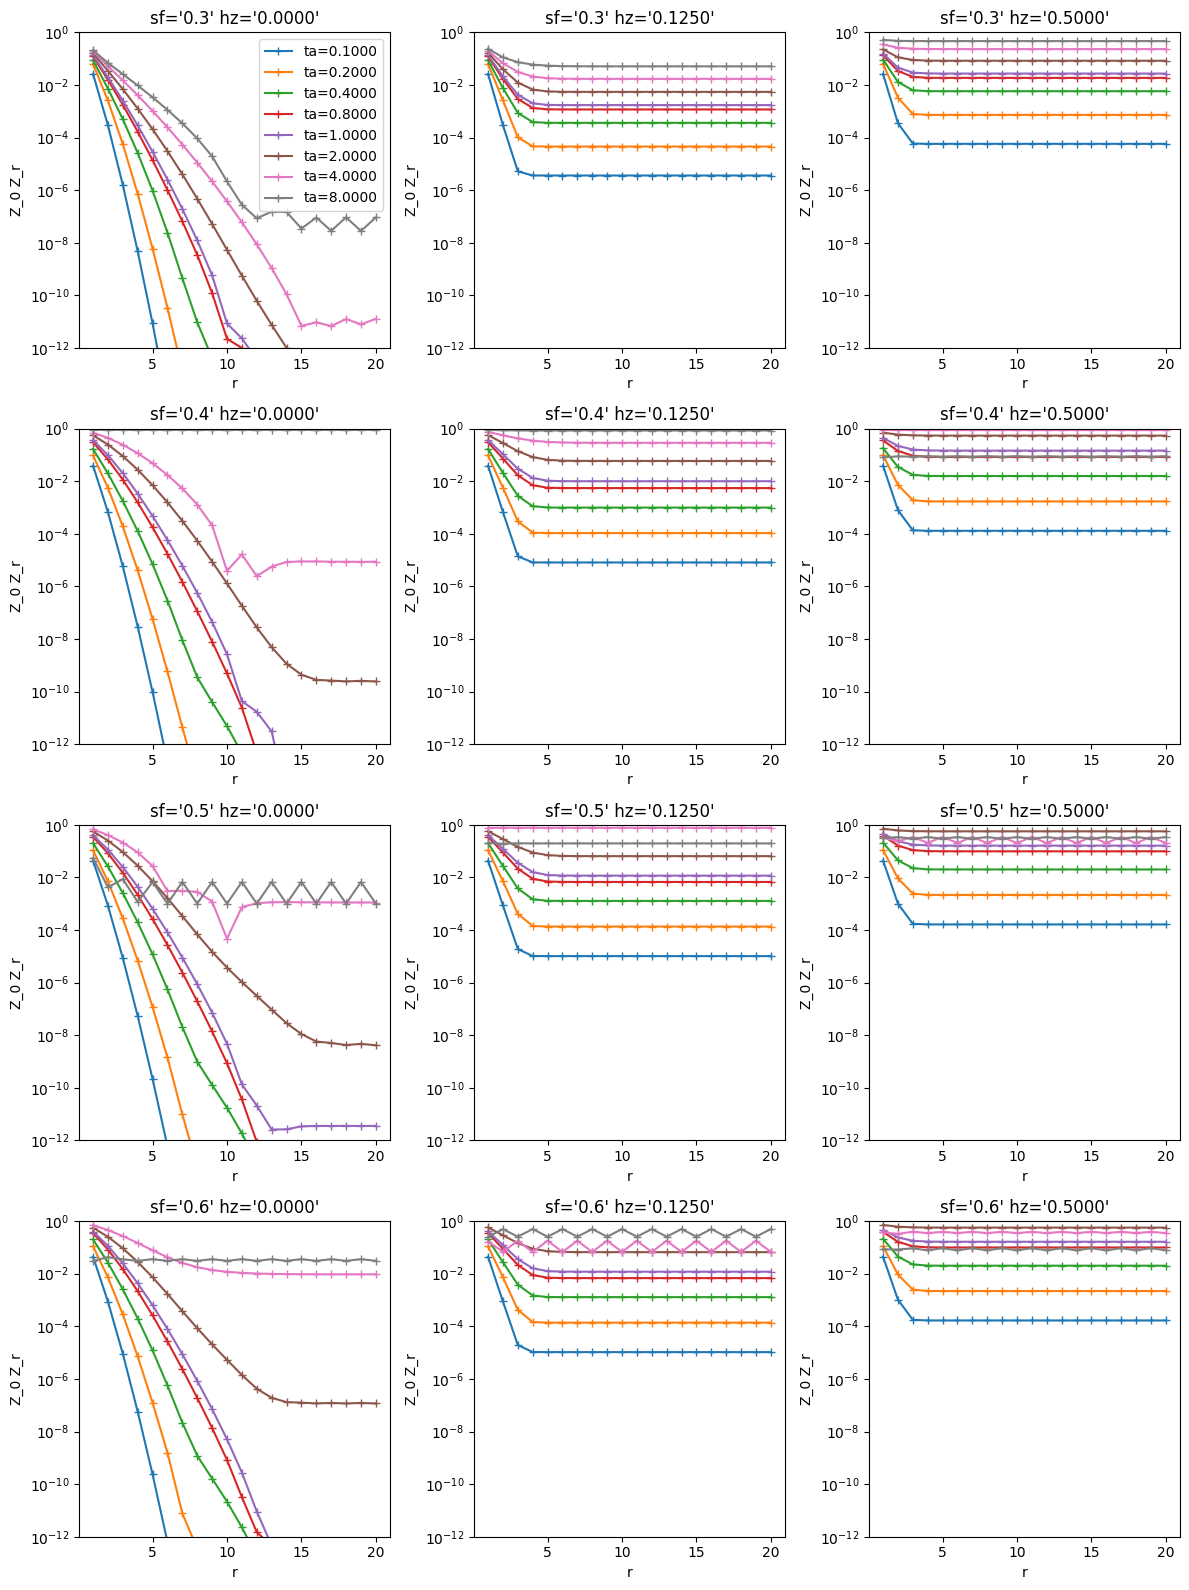

In [21]:
fig, axs = plt.subplots(4, 3)
fig.set_size_inches((12, 16))

for i2, hz in enumerate(['0.0000', '0.1250', '0.5000']):
    for i1, sf in enumerate(["0.3", "0.4", "0.5", "0.6"]):
        for ta in ['0.1000', '0.2000', '0.4000', '0.8000', '1.0000', '2.0000', '4.0000', '8.0000']:
            try:
                v = data_s2zz[hz, ta, '1.0', sf, 1]
                axs[i1, i2].semilogy(np.arange(20) + 1, np.abs(v), '-+', label=f"ta={ta}")
            except:
                pass
        
        axs[i1, i2].set_xlabel('r')
        axs[i1, i2].set_ylabel('Z_0 Z_r')
        axs[i1, i2].set_ylim([1e-12, 1])
        axs[i1, i2].set_title(f'{sf=} {hz=}')
        

axs[0, 0].legend()
fig.tight_layout()
# plt.title('1-exp(-40*s) critical point')


(0.0, 10.0)

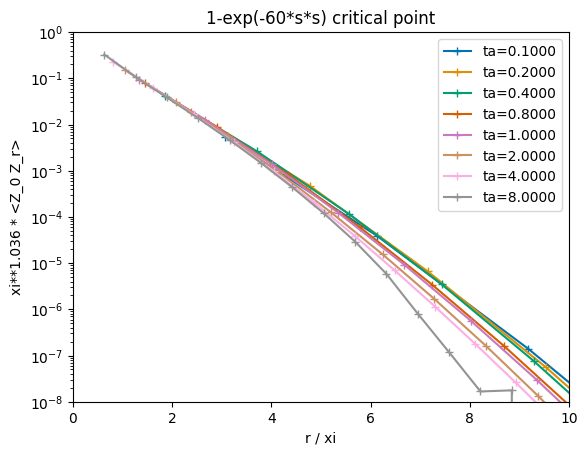

In [38]:
for i, ta in enumerate(['0.1000', '0.2000', '0.4000', '0.8000', '1.0000', '2.0000', '4.0000', '8.0000']):
    try:
        v = data_s3zz['0.0000', ta, '1.0', '0.3', 1]
        xi = (float(ta) * 0.44705341) ** 0.36
        plt.semilogy((np.arange(20) + 1) / xi, xi**1.036 * np.array(v), '-+', label=f"ta={ta}", color=cm[i])

        # v = data_s2zz['0.0000', ta, '1.0', '0.3', 1]
        # xi = (float(ta) * 0.44705341) ** 0.36
        # plt.semilogy((np.arange(20) + 1) / xi, xi**1.036 * np.array(v), '-x', label=f"ta={ta}", color=cm[i])
    except:
        pass

plt.legend()
plt.xlabel('r / xi')
plt.ylabel(f'xi**1.036 * <Z_0 Z_r>')
plt.title('1-exp(-60*s*s) critical point')
plt.ylim([1e-8, 1])
plt.xlim([0, 10])

(0.0, 10.0)

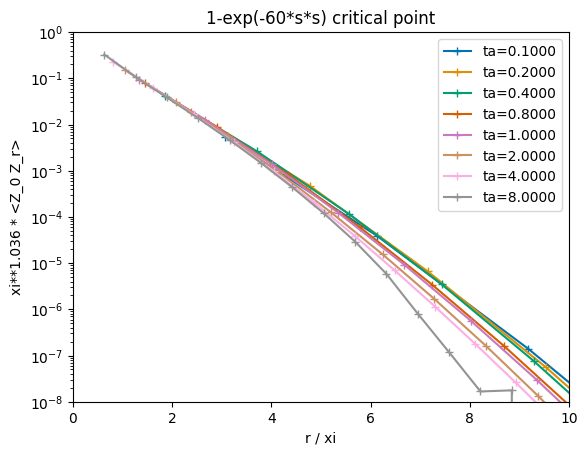

In [16]:
for i, ta in enumerate(['0.1000', '0.2000', '0.4000', '0.8000', '1.0000', '2.0000', '4.0000', '8.0000']):
    try:
        v = data_s3zz['0.0000', ta, '1.0', '0.3', 1]
        xi = (float(ta) * 0.44705341) ** 0.36
        plt.semilogy((np.arange(20) + 1) / xi, xi**1.036 * np.array(v), '-+', label=f"ta={ta}", color=cm[i])

        # v = data_s2zz['0.0000', ta, '1.0', '0.3', 1]
        # xi = (float(ta) * 0.44705341) ** 0.36
        # plt.semilogy((np.arange(20) + 1) / xi, xi**1.036 * np.array(v), '-x', label=f"ta={ta}", color=cm[i])
    except:
        pass

plt.legend()
plt.xlabel('r / xi')
plt.ylabel(f'xi**1.036 * <Z_0 Z_r>')
plt.title('1-exp(-60*s*s) critical point')
plt.ylim([1e-8, 1])
plt.xlim([0, 10])

In [17]:
data2 = {}
for fname in glob.glob("./bias_dwave_s3/**/data*.csv", recursive=True):
    unit = 2 if "cluster" in fname else 1
    param = fname.split("/")
    hz = param[2][3:]
    ta = param[3][3:]
    E = param[4][2:5]
    if 'new' in param[5]: 
        fieldnames = ["D", "which", "chi", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, int, float, float, float, float, float, float]
        sf = param[5][12:15]
        ind = (hz, ta, E, sf, unit)
    else:
        fieldnames = ["D", "which", "dt", "Delta", "time", "Ezz", "Ez", "Ex"]
        dtypes =     [int, str, float, float, float, float, float, float]
        sf = param[5][8:11]
        ind = (hz, ta, E, sf, unit)
    
    with open(fname, 'r', newline='') as csvfile:
        csvfile.readline()
        data2[ind] = []
        for x in csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=";"):
            for fn, typ in zip(fieldnames, dtypes):
                x[fn] = typ(x[fn])
            x["Eng"] = (-2 * x["Ezz"] - float(hz) * x["Ez"])   
            data2[ind].append(x)


In [18]:
tmp = [
        [1.0, -0.01, 0.005378, -1.4548991789819377, 0.13351395730706075],
        [1.0, -0.01, 0.006215, -1.5013544252873563, 0.15054926108374383],
        [1.0, -0.01, 0.007182, -1.5354535960591134, 0.16621346469622333],
        [1.0, -0.01, 0.008299, -1.574988037766831, 0.18205500821018064],
        [1.0, -0.01, 0.00959, -1.6203180870279146, 0.24059359605911332],
        [1.0, -0.123285, 0.005378, -1.7781699161083744, 0.7834581280788178],
        [1.0, -0.123285, 0.006215, -1.85247941819376, 0.8421149425287355],
        [1.0, -0.123285, 0.007182, -1.9092483911042695, 0.8907134646962234],
        [1.0, -0.123285, 0.008299, -1.9876160641133007, 0.9358571428571429],
        [1.0, -0.123285, 0.00959, -2.032800773132184, 0.9644129720853859],
        [0.5, -0.01, 0.005549, -1.705386592775041, 0.3167380952380952],
        [0.5, -0.01, 0.006412, -1.733872684729064, 0.33603694581280785],
        [0.5, -0.01, 0.00741, -1.7638589408866998, 0.393611658456486],
        [0.5, -0.01, 0.008562, -1.793247142857143, 0.4612495894909688],
        [0.5, -0.01, 0.009894, -1.8259166584564863, 0.5314031198686371],
        [0.5, -0.123285, 0.005549, -2.111726872142857, 0.9973908045977011],
        [0.5, -0.123285, 0.006412, -2.115999018251231, 0.9990788177339901],
        [0.5, -0.123285, 0.00741, -2.1177036078489326, 0.9995862068965516],
        [0.5, -0.123285, 0.008562, -2.1178193599712642, 0.9996527093596057],
        [0.5, -0.123285, 0.009894, -2.119064000024631, 0.9999655172413793],
    ]

dwave = {}
for rec in tmp:
    hz = f"{-rec[1]:0.4f}"
    ta = f"{1000 * rec[2]:0.4f}"
    E = f"{rec[0]:0.1f}"
    dwave[(hz, ta, E)] = {"Ez": rec[4], "Eng": rec[3]}


mps = {("0.1233", "1.0000", "1.0"): {"Ez": 0.116, "Ezz": 0.443453542},
       ("0.1233", "2.0000", "1.0"): {"Ez": 0.272, "Ezz": 0.57921718},
       ("0.1233", "4.0000", "1.0"): {"Ez": 0.560, "Ezz": 0.682156001}}

In [19]:
clrs = {'1': 'y', '2': 'g', '4': 'b', '8': 'r'}

def plot_point(hz, ta, E, s):
    if not isinstance(hz, str): hz = f"{hz:0.4f}"
    if not isinstance(ta, str): ta = f"{ta:0.4f}"
    if not isinstance(E, str):  E = f"{E:0.1f}"
    if not isinstance(s, str):  s = f"{s:0.1f}"

    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches((12, 4))
    for i, val in [(0, 'Delta'), (1, 'Ezz'), (2, 'Ez')]:
        ax = axs[i]
        for which in [1, 2]:
            ind = (hz, ta, E, s, which)
            if ind in data:
                for tmp in data[ind]:
                    clr = clrs[tmp['chi']] if 'chi' in tmp else 'k'
                    mrk = 'o'
                    if 'chi' in tmp and 1 == which and 'NN' in tmp['which']:
                        mrk = 'x' 
                    if 'chi' in tmp and 1 == which and 'NN' not in tmp['which']:
                        mrk = '+' 
                    if 'chi' in tmp and 2 == which:
                        mrk = '.'                     
                    ax.scatter([1 / float(tmp["D"])], 
                            [float(tmp[val])], color=clr, marker=mrk)
            ax.set_xlabel('1 / D')
        ax.set_ylabel(val)
        ax.set_xlim([0, 0.3])
    
    dind = (hz, ta, E)
    print(dind)
    if dind in dwave:
        axs[2].plot([0, 0.3], [dwave[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [dwave[dind]['Eng']] * 2)
    if dind in mps:
        axs[2].plot([0, 0.3], [mps[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [mps[dind]['Ezz']] * 2)


    axs[0].set_ylim([1e-5, 10])
    axs[0].set_yscale('log')
    # axs[1].set_ylim([0, 1])
    # axs[2].set_ylim([-1, 1])

    for k, v in clrs.items():
        axs[0].scatter([1], [1], marker='x', color=v, label=f"1site NN+BP chi={k}")
        axs[0].scatter([1], [1], marker='+', color=v, label=f"1site BP chi={k}")
        axs[0].scatter([1], [1], marker='.', color=v, label=f"21site BP chi={k}")

    axs[0].scatter([1], [1], marker='o', color='k', label=f"chi=4D")
    
    axs[0].legend()
    fig.suptitle(f"hz={hz} ta={ta} E={E} s={s}")
    fig.tight_layout()


NameError: name 'data' is not defined

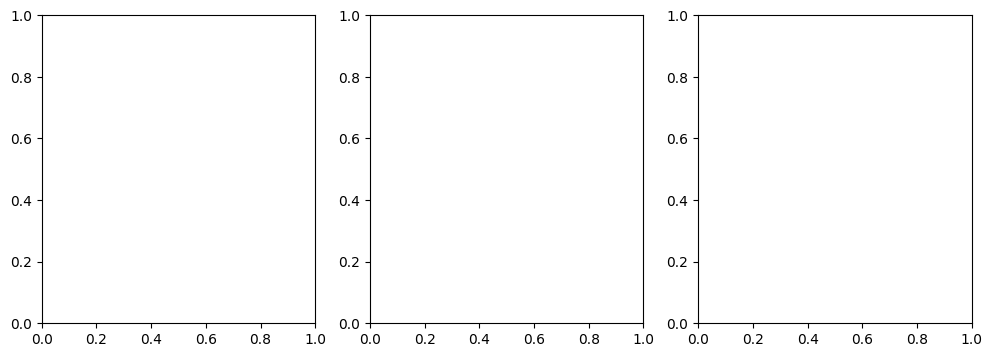

In [20]:
#plot_point(hz=0.01, ta=5.3780, E=1.0, s=0.6)
for ta in [0.1, 0.2, 0.4, 0.8]: #, 2.0, 4.0]:
    plot_point(hz=0.0, ta=ta, E=1.0, s=0.3)  # 5.3780

In [ ]:
def plot_Ezz(hz = '0.0000', E = '1.0', sf = '0.6', which = 1):
    dd = {k: v for k, v in data.items() if k[0] == hz and k[2] == E and k[3] == sf and k[4] == which}
    dd2 = {k: v for k, v in data2.items() if k[0] == hz and k[2] == E and k[3] == sf and k[4] == which}

    # clrs = {'NN+': 'k', 'NN+BP': 'b', 'BP': 'r', 'NN': 'g'}
    for k, vs in dd.items():
        ta = float(k[1])
        for v in vs:    
            plt.scatter([ta], [v['Ezz']], marker='+', color = 'b', s=81, alpha = float(v['chi'])/16) # color=clrs[v['which']], s=81)

    for k, vs in dd2.items():
        ta = float(k[1])
        for v in vs:    
            plt.scatter([ta], [v['Ezz']], marker='x', color = 'r', s=64, alpha = float(v['chi'])/16) # color=clrs[v['which']])

    
    plt.scatter([1], [10], marker='x', color = 'r', label='1-exp(-60*s*s)')
    plt.scatter([1], [10], marker='+', color = 'b', label='1-exp(-40*s)')

    plt.ylim([1e-2, 1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('ta')
    plt.ylabel("ZZ")
    plt.title(f'sf={sf} hz={hz}')
    plt.legend()

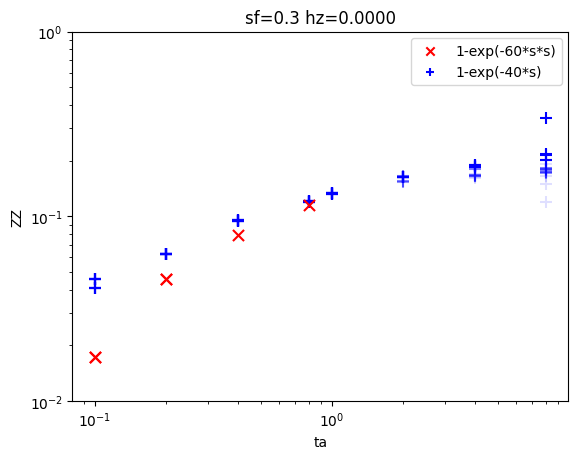

In [ ]:
plot_Ezz('0.0000', '1.0', '0.3', 1)


Text(0, 0.5, 'Ezz')

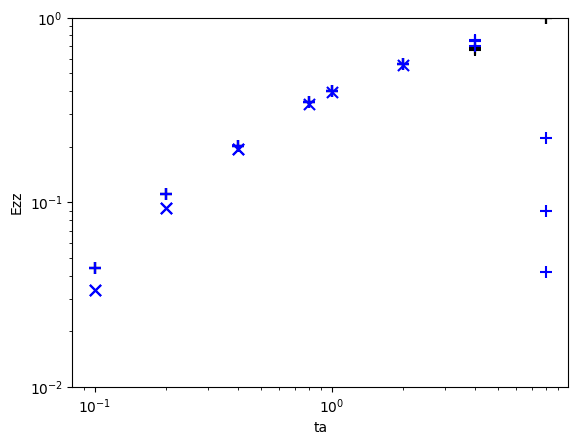

In [ ]:
# (hz, ta, E, s, which)
hz = '0.0000'
E = '1.0'
sf = '0.6'
which = 1

dd = {k: v for k, v in data.items() if k[0] == hz and k[2] == E and k[3] == sf and k[4] == which}
dd2 = {k: v for k, v in data2.items() if k[0] == hz and k[2] == E and k[3] == sf and k[4] == which}

clrs = {'NN+': 'k', 'NN+BP': 'b', 'BP': 'r', 'NN': 'g'}
for k, vs in dd.items():
    ta = float(k[1])
    for v in vs:    
        plt.scatter([ta], [v['Ezz']], marker='+', color=clrs[v['which']], s=81)

for k, vs in dd2.items():
    ta = float(k[1])
    for v in vs:    
        plt.scatter([ta], [v['Ezz']], marker='x', color=clrs[v['which']], s=64, alpha = float(v['chi'])/16)

plt.ylim([1e-2, 1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ta')
plt.ylabel("Ezz")

In [ ]:
clrs = {1: 'y', 2: 'g', 4: 'b', 8: 'r', 16: 'c'}

def plot_point(hz, ta, E, s):
    if not isinstance(hz, str): hz = f"{hz:0.4f}"
    if not isinstance(ta, str): ta = f"{ta:0.4f}"
    if not isinstance(E, str):  E = f"{E:0.1f}"
    if not isinstance(s, str):  s = f"{s:0.1f}"

    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches((12, 4))
    for i, val in [(0, 'Delta'), (1, 'Ezz'), (2, 'Ez')]:
        ax = axs[i]
        for which in [1, 2]:
            ind = (hz, ta, E, s, which)
            if ind in data:
                for tmp in data[ind]:
                    clr = clrs[tmp['chi']] if 'chi' in tmp else 'k'
                    mrk = 'o'
                    if 'chi' in tmp and 1 == which and 'NN' in tmp['which']:
                        mrk = 'x' 
                    if 'chi' in tmp and 1 == which and 'NN' not in tmp['which']:
                        mrk = '+' 
                    if 'chi' in tmp and 2 == which:
                        mrk = '.'                     
                    ax.scatter([1 / float(tmp["D"])], 
                            [float(tmp[val])], color=clr, marker=mrk)
            ax.set_xlabel('1 / D')
        ax.set_ylabel(val)
        ax.set_xlim([0, 0.3])
    
    dind = (hz, ta, E)
    print(dind)
    if dind in dwave:
        axs[2].plot([0, 0.3], [dwave[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [dwave[dind]['Eng']] * 2)
    if dind in mps:
        axs[2].plot([0, 0.3], [mps[dind]['Ez']] * 2)
        axs[1].plot([0, 0.3], [mps[dind]['Ezz']] * 2)


    axs[0].set_ylim([1e-5, 10])
    axs[0].set_yscale('log')
    # axs[1].set_ylim([0, 1])
    # axs[2].set_ylim([-1, 1])

    for k, v in clrs.items():
        axs[0].scatter([1], [1], marker='x', color=v, label=f"1site NN+BP chi={k}")
        axs[0].scatter([1], [1], marker='+', color=v, label=f"1site BP chi={k}")
        axs[0].scatter([1], [1], marker='.', color=v, label=f"21site BP chi={k}")

    axs[0].scatter([1], [1], marker='o', color='k', label=f"chi=4D")
    
    axs[0].legend()
    fig.suptitle(f"hz={hz} ta={ta} E={E} s={s}")
    fig.tight_layout()


('0.0000', '1.0000', '1.0')


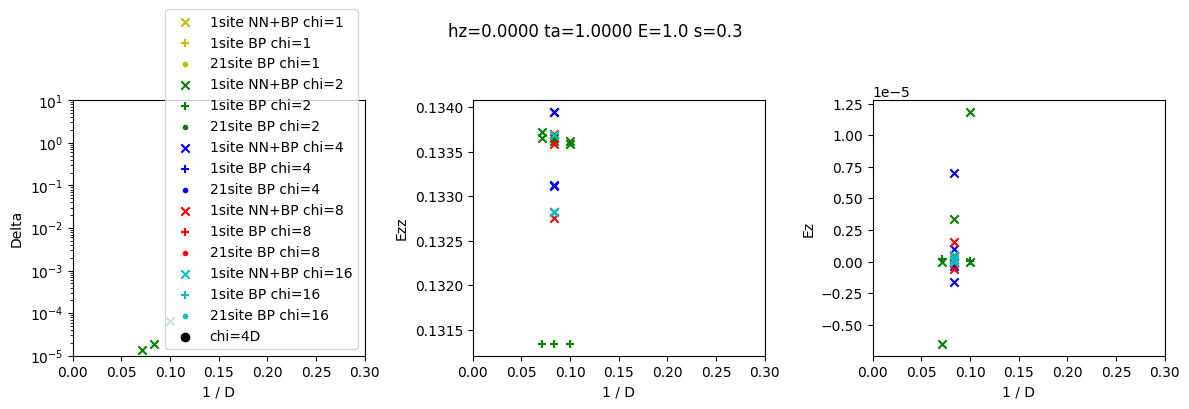

In [ ]:
plot_point(0, 1, 1, 0.3)